# Black Friday sales
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

|Variable|Definition|
|:-------:|:-------:|
|User_ID|User ID|
|Product_ID |Product ID|
|Gender|Sex of User|
|Age|Age in bins|
|Occupation|Occupation (Masked)|
|City_Category|Category of the City (A,B,C)|
|Stay_In_Current_City_Years|Number of years stay in current city|
|Marital_Status|Marital Status|
|Product_Category_1|Product Category (Masked)|
|Product_Category_2|Product may belongs to other category also (Masked)|
|Product_Category_3|Product may belongs to other category also (Masked)|
|Purchase|Purchase Amount (Target Variable)|

In [1]:
# Importing required libraries
import io
import os
import numpy as np # linear algebra
import pandas as pd # importing i/o files
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # Data visualization
%matplotlib inline

In [2]:
# Folder Path directly we can access the files in that folder
%cd "D:\Imarticus\stat\Balck Friday"

D:\Imarticus\stat\Balck Friday


In [3]:
bf_tr=pd.read_csv('train.csv') #importing the train file of the dataset

In [4]:
bf_tt=pd.read_csv('test.csv') #importing the test file of the dataset

In [5]:
# head() is used to display the first few rows of a DataFrame or a Series. It helps you get a quick overview of the data.
bf_tr.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
# tail() method is similar to head(), but it displays the last few rows of a DataFrame or a Series.
bf_tr.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


In [7]:
# The dtypes attribute of a DataFrame provides information about the data types of each column.
bf_tr.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [8]:
# The describe() method provides a summary of the central tendency, dispersion, and shape of the distribution of the data.
bf_tr.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [9]:
# The info() method provides a concise summary of a DataFrame, including information about the data types, non-null values, and memory usage.
bf_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [10]:
# head() is used to display the first few rows of a DataFrame or a Series. It helps you get a quick overview of the data.
bf_tt.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [11]:
# tail() method is similar to head(), but it displays the last few rows of a DataFrame or a Series.
bf_tt.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN
233598,1006039,P00316642,F,46-50,0,B,4+,1,4,5.0,NaN


In [12]:
# The dtypes attribute of a DataFrame provides information about the data types of each column.
bf_tt.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
dtype: object

In [13]:
#The describe() method provides a summary of the central tendency, dispersion, and shape of the distribution of the data.
bf_tt.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
count,2.335990e+05,233599.000000,233599.000000,233599.000000,161255.000000,71037.000000
mean,1.003029e+06,8.085407,0.410070,5.276542,9.849586,12.669454
std,1.726505e+03,6.521146,0.491847,3.736380,5.094943,4.125944
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000
25%,1.001527e+06,2.000000,0.000000,1.000000,5.000000,9.000000
50%,1.003070e+06,7.000000,0.000000,5.000000,9.000000,14.000000
75%,1.004477e+06,14.000000,1.000000,8.000000,15.000000,16.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000


In [14]:
# The info() method provides a concise summary of a DataFrame, including information about the data types, non-null values, and memory usage.
bf_tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


# Missing values or NaN values imputation

In [15]:
bf_tr.Product_Category_2.value_counts(dropna=False)

Product_Category_2
NaN     173638
8.0      64088
14.0     55108
2.0      49217
16.0     43255
15.0     37855
5.0      26235
4.0      25677
6.0      16466
11.0     14134
17.0     13320
13.0     10531
9.0       5693
12.0      5528
10.0      3043
3.0       2884
18.0      2770
7.0        626
Name: count, dtype: int64

**So We are imputing nan values with 99 because the Product_Category_2 & Product_Category_3 in numerical**

In [16]:
bf_tr.Product_Category_2=bf_tr.Product_Category_2.fillna(99)

In [17]:
bf_tr.Product_Category_3.value_counts(dropna=False)

Product_Category_3
NaN     383247
16.0     32636
15.0     28013
14.0     18428
17.0     16702
5.0      16658
8.0      12562
9.0      11579
12.0      9246
13.0      5459
6.0       4890
18.0      4629
4.0       1875
11.0      1805
10.0      1726
3.0        613
Name: count, dtype: int64

In [18]:
bf_tr.Product_Category_3=bf_tr.Product_Category_3.fillna(99)

In [19]:
bf_tt.Product_Category_2.value_counts(dropna=False)

Product_Category_2
NaN     72344
8.0     27229
14.0    23726
2.0     21281
16.0    18432
15.0    16259
4.0     11028
5.0     10930
6.0      7109
11.0     6096
17.0     5784
13.0     4523
9.0      2484
12.0     2273
10.0     1377
18.0     1257
3.0      1239
7.0       228
Name: count, dtype: int64

In [20]:
bf_tt.Product_Category_2=bf_tt.Product_Category_2.fillna(99)

In [21]:
bf_tt.Product_Category_3.value_counts(dropna=False)

Product_Category_3
NaN     162562
16.0     13833
15.0     11955
14.0      7855
5.0       7141
17.0      7116
8.0       5299
9.0       4953
12.0      3869
13.0      2390
6.0       1998
18.0      1992
4.0        816
11.0       780
10.0       775
3.0        265
Name: count, dtype: int64

In [22]:
bf_tt.Product_Category_3=bf_tt.Product_Category_3.fillna(99)

In [23]:
bf_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


# Exploratory Data Analysis(EDA)

In [24]:
#target value Purchase
bf_tr.Purchase.describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

In [25]:
print('skewness:',bf_tr.Purchase.skew())
print('Kurtosis:',bf_tr.Purchase.kurt())

skewness: 0.6001400037087128
Kurtosis: -0.3383775655851702


<Figure size 3000x1500 with 0 Axes>

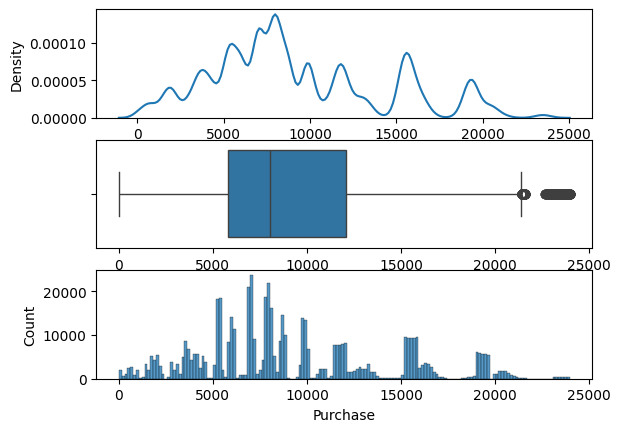

In [26]:
plt.figure(figsize=(30,15))
fig,ax=plt.subplots(3,1)
sns.kdeplot(bf_tr.Purchase,ax=ax[0])
sns.boxplot(bf_tr.Purchase,orient='h',ax=ax[1])
sns.histplot(bf_tr.Purchase,ax=ax[2])
plt.show()

In [27]:
bf_tr.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [28]:
bf_tr.Gender.value_counts(ascending=False)

Gender
M    414259
F    135809
Name: count, dtype: int64

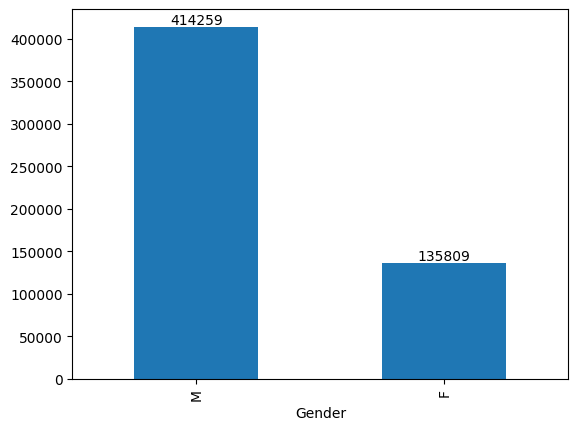

In [29]:
ax=bf_tr.Gender.value_counts().plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)

In [30]:
bf_tr.Age.value_counts()

Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64

<Axes: ylabel='count'>

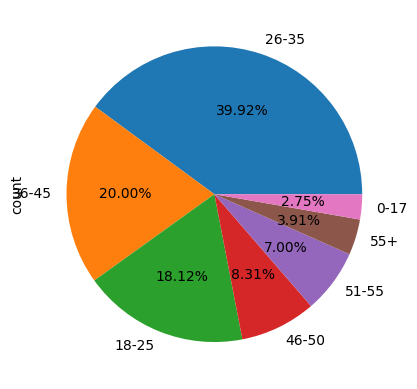

In [31]:
bf_tr.Age.value_counts().plot(kind='pie',autopct='%0.2f%%')

In [32]:
bf_tr.Occupation.value_counts()

Occupation
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: count, dtype: int64

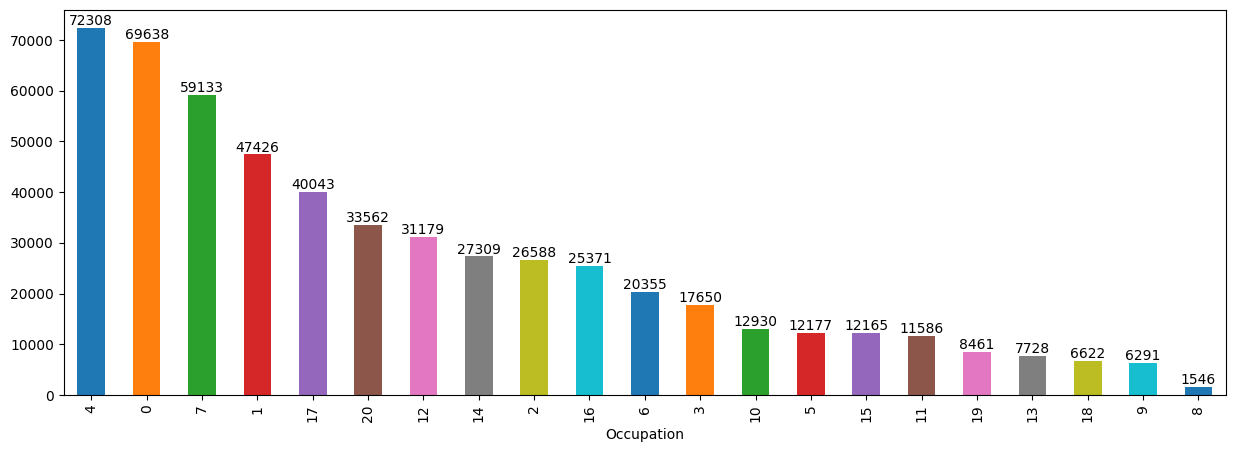

In [33]:
plt.figure(figsize=(15,5))
ax=bf_tr.Occupation.value_counts().plot(kind='bar',color=sns.color_palette())
ax.bar_label(ax.containers[0])
plt.show()

In [34]:
bf_tr.City_Category.value_counts()

City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64

<Axes: ylabel='count'>

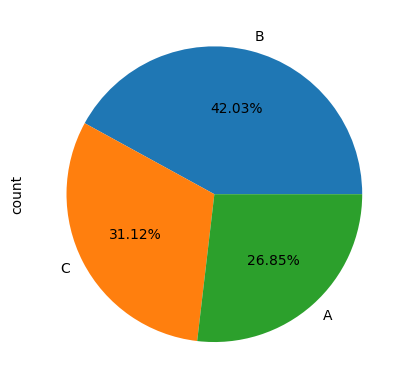

In [35]:
bf_tr.City_Category.value_counts().plot(kind='pie',autopct='%0.2f%%')

In [36]:
pd.crosstab(bf_tr.Age,bf_tr.Gender)

Gender,F,M
Age,,
0-17,5083,10019
18-25,24628,75032
26-35,50752,168835
36-45,27170,82843
46-50,13199,32502
51-55,9894,28607
55+,5083,16421


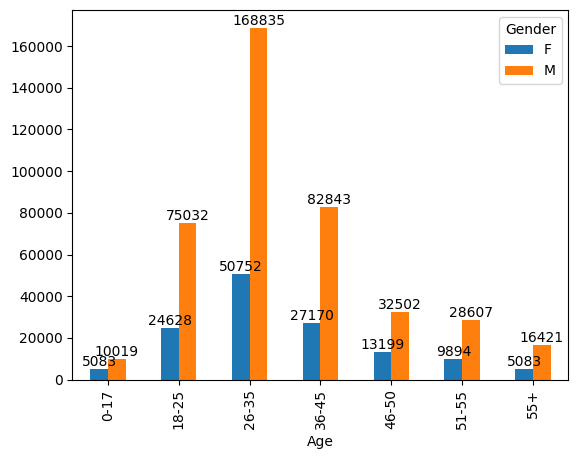

In [37]:
ax=pd.crosstab(bf_tr.Age,bf_tr.Gender).plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

In [38]:
bf_tr.Purchase.groupby(bf_tr.Age).mean()

Age
0-17     8933.464640
18-25    9169.663606
26-35    9252.690633
36-45    9331.350695
46-50    9208.625697
51-55    9534.808031
55+      9336.280459
Name: Purchase, dtype: float64

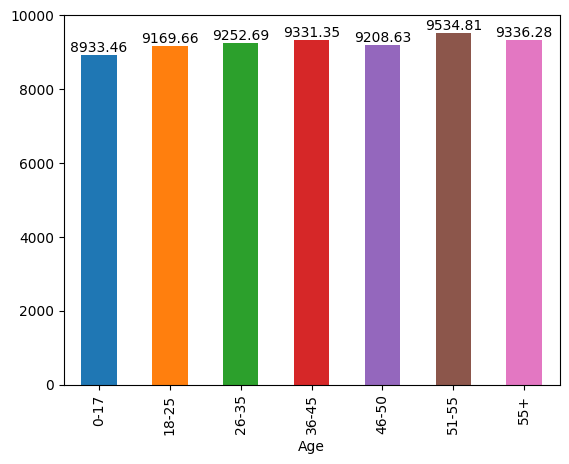

In [39]:
ax=bf_tr.Purchase.groupby(bf_tr.Age).mean().plot(kind='bar',color=sns.color_palette())
for i in ax.containers:
    ax.bar_label(i)

# Hypothesis Testing
## Test Null Average purchases for different gender equal

In [40]:
bf_tr.Purchase.groupby(bf_tr.Gender).mean()

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

In [41]:
bf_tr.Purchase.groupby(bf_tr.Gender).var()

Gender
F    2.272651e+07
M    2.593036e+07
Name: Purchase, dtype: float64

In [42]:
f=bf_tr[bf_tr.Gender=='F']
m=bf_tr[bf_tr.Gender=='M']

In [43]:
from scipy.stats import ttest_ind

In [44]:
ttest_ind(f.Purchase,m.Purchase,equal_var=False)
#since p-value=0.0 is less than .05 ,reject null hypothesis
# Alternative hypothesis is true, there is significance difference in average of purchase to Gender

TtestResult(statistic=-46.358248669626064, pvalue=0.0, df=245162.81682463537)

## Test Null Average Purchases for Different Marital_Status equal

In [45]:
bf_tr.Purchase.groupby(bf_tr.Marital_Status).mean()

Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

In [46]:
bf_tr.Purchase.groupby(bf_tr.Marital_Status).var()

Marital_Status
0    2.527423e+07
1    2.516926e+07
Name: Purchase, dtype: float64

In [47]:
zero=bf_tr[bf_tr.Marital_Status==0]
one=bf_tr[bf_tr.Marital_Status==1]

In [48]:
ttest_ind(zero.Purchase,one.Purchase,equal_var=False)
#since p-value=0.7309975627344574 is more than .05 ,fail to reject null hypothesis
# Alternative hypothesis is false, there is no significance difference in average of purchase to Ma`rtial_status

TtestResult(statistic=0.34379905124865934, pvalue=0.7309975627344574, df=485276.8977660196)

## Test Null Average Purchases for Different Age groups equal

In [49]:
bf_tr.Purchase.groupby(bf_tr.Age).mean()

Age
0-17     8933.464640
18-25    9169.663606
26-35    9252.690633
36-45    9331.350695
46-50    9208.625697
51-55    9534.808031
55+      9336.280459
Name: Purchase, dtype: float64

In [50]:
bf_tr.Purchase.groupby(bf_tr.Age).var()

Age
0-17     2.612349e+07
18-25    2.534440e+07
26-35    2.510538e+07
36-45    2.522976e+07
46-50    2.467324e+07
51-55    2.588131e+07
55+      2.511507e+07
Name: Purchase, dtype: float64

In [51]:
a=bf_tr[bf_tr.Age=='0-17']
b=bf_tr[bf_tr.Age=='18-25']
c=bf_tr[bf_tr.Age=='26-35']
d=bf_tr[bf_tr.Age=='36-45']
e=bf_tr[bf_tr.Age=='46-50']
f=bf_tr[bf_tr.Age=='51-55']
g=bf_tr[bf_tr.Age=='55+']

In [52]:
from scipy.stats import f_oneway

In [53]:
f_oneway(a.Purchase,b.Purchase,c.Purchase,d.Purchase,e.Purchase,f.Purchase,g.Purchase)
#since p-value=1.053563939251671e-49 less than 0.05 ,reject null hypothesis
# alternative hypothesis is True, there is significance difference in average of purchase to Age

F_onewayResult(statistic=40.57579909450407, pvalue=1.0535639392516708e-49)

## Test Null Average Purchases for Different City_category equal

In [54]:
bf_tr.Purchase.groupby(bf_tr.City_Category).mean()

City_Category
A    8911.939216
B    9151.300563
C    9719.920993
Name: Purchase, dtype: float64

In [55]:
A=bf_tr[bf_tr.City_Category=='A']
B=bf_tr[bf_tr.City_Category=='B']
C=bf_tr[bf_tr.City_Category=='C']

In [56]:
f_oneway(A.Purchase,B.Purchase,C.Purchase)
#since p-value=0.0 less than 0.05 ,reject null hypothesis
# alternative hypothesis is True, there is significance difference in average of purchase to Age

F_onewayResult(statistic=1130.7459610102974, pvalue=0.0)

## Test Null Average Purchases for different Stay)In_Current_City_Years

In [57]:
bf_tr.Purchase.groupby(bf_tr.Stay_In_Current_City_Years).mean()

Stay_In_Current_City_Years
0     9180.075123
1     9250.145923
2     9320.429810
3     9286.904119
4+    9275.598872
Name: Purchase, dtype: float64

In [58]:
bf_tr.Purchase.groupby(bf_tr.Stay_In_Current_City_Years).var()

Stay_In_Current_City_Years
0     2.490489e+07
1     2.527552e+07
2     2.544787e+07
3     2.520385e+07
4+    2.517659e+07
Name: Purchase, dtype: float64

In [59]:
q=bf_tr[bf_tr.Stay_In_Current_City_Years=='0']
w=bf_tr[bf_tr.Stay_In_Current_City_Years=='1']
r=bf_tr[bf_tr.Stay_In_Current_City_Years=='2']
t=bf_tr[bf_tr.Stay_In_Current_City_Years=='3']
y=bf_tr[bf_tr.Stay_In_Current_City_Years=='4+']

In [60]:
f_oneway(q.Purchase,w.Purchase,e.Purchase,r.Purchase,t.Purchase,y.Purchase)
#since p-value=4.203053657961194e-08 less than 0.05 ,reject null hypothesis
# alternative hypothesis is True, there is significance difference in average of purchase to Stay_In_Current_City_years

F_onewayResult(statistic=8.545072191436018, pvalue=4.203053657961194e-08)

## Test Null No Association Between Gender and Age

In [61]:
pd.crosstab(bf_tr.Gender,bf_tr.Age)

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
Gender,,,,,,,
F,5083,24628,50752,27170,13199,9894,5083
M,10019,75032,168835,82843,32502,28607,16421


In [62]:
from scipy.stats import chi2_contingency

In [63]:
chi2_contingency(pd.crosstab(bf_tr.Gender,bf_tr.Age))

Chi2ContingencyResult(statistic=1412.7156576195039, pvalue=4.2750569064909935e-302, dof=6, expected_freq=array([[  3728.60722311,  24605.54865944,  54214.9168521 ,
         27161.65186304,  11283.34516642,   9505.70167507,
          5309.22856083],
       [ 11373.39277689,  75054.45134056, 165372.0831479 ,
         82851.34813696,  34417.65483358,  28995.29832493,
         16194.77143917]]))

In [64]:
bf_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


## Test Null No Association between Gender and Marital_Status

In [65]:
pd.crosstab(bf_tr.Gender,bf_tr.Marital_Status)

Marital_Status,0,1
Gender,,
F,78821,56988
M,245910,168349


In [66]:
chi2_contingency(pd.crosstab(bf_tr.Gender,bf_tr.Marital_Status))

Chi2ContingencyResult(statistic=74.00272697523472, pvalue=7.80091894540745e-18, dof=1, expected_freq=array([[ 80174.43730412,  55634.56269588],
       [244556.56269588, 169702.43730412]]))

## Test Null No Association Between Marital_Status and Occupation

In [67]:
pd.crosstab(bf_tr.Marital_Status,bf_tr.Occupation)

Occupation,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
Marital_Status,,,,,,,,,,,,,,,,,,,,,
0,40489,24724,14306,10364,52776,7608,11190,33403,691,3038,...,7140,16680,3630,16062,6650,13368,22732,3615,6926,17162
1,29149,22702,12282,7286,19532,4569,9165,25730,855,3253,...,4446,14499,4098,11247,5515,12003,17311,3007,1535,16400


In [68]:
chi2_contingency(pd.crosstab(bf_tr.Marital_Status,bf_tr.Occupation))

Chi2ContingencyResult(statistic=18710.023962434694, pvalue=0.0, dof=20, expected_freq=array([[41110.58519674, 27997.79737414, 15696.14634554, 10419.62475548,
        42686.81171782,  7188.65556077, 12016.51342198, 34908.98983944,
          912.67648   ,  3713.87305024,  7633.18686053,  6839.76047689,
        18406.42947599,  4562.20170597, 16121.78654094,  7181.57139663,
        14977.69403237, 23639.26538719,  3909.27791109,  4994.9260655 ,
        19813.22640474],
       [28527.41480326, 19428.20262586, 10891.85365446,  7230.37524452,
        29621.18828218,  4988.34443923,  8338.48657802, 24224.01016056,
          633.32352   ,  2577.12694976,  5296.81313947,  4746.23952311,
        12772.57052401,  3165.79829403, 11187.21345906,  4983.42860337,
        10393.30596763, 16403.73461281,  2712.72208891,  3466.0739345 ,
        13748.77359526]]))

In [69]:
bf_tr.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,99.0,99.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,99.0,99.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,99.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,99.0,99.0,7969


In [70]:
blackfriday=bf_tr.drop(['User_ID','Product_ID'],axis=1)

In [71]:
bf_tt=bf_tt.drop(['User_ID','Product_ID'],axis=1)

In [72]:
blackfriday.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,99.0,99.0,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,99.0,99.0,1422
3,F,0-17,10,A,2,0,12,14.0,99.0,1057
4,M,55+,16,C,4+,0,8,99.0,99.0,7969


# splitting into num cols and objcols

In [73]:
numcols=blackfriday.select_dtypes(include=np.number)
objcols=blackfriday.select_dtypes(include='object')

In [74]:
numcols.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,10,0,3,99.0,99.0,8370
1,10,0,1,6.0,14.0,15200
2,10,0,12,99.0,99.0,1422
3,10,0,12,14.0,99.0,1057
4,16,0,8,99.0,99.0,7969


In [75]:
objcols.head()

,Gender,Age,City_Category,Stay_In_Current_City_Years
0,F,0-17,A,2
1,F,0-17,A,2
2,F,0-17,A,2
3,F,0-17,A,2
4,M,55+,C,4+


In [76]:
numcols.corr()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Occupation,1.000000,0.024280,-0.007618,-0.009395,-0.009903,0.020833
Marital_Status,0.024280,1.000000,0.019888,0.011224,0.009738,-0.000463
Product_Category_1,-0.007618,0.019888,1.000000,0.471480,0.450101,-0.343703
Product_Category_2,-0.009395,0.011224,0.471480,1.000000,0.493498,-0.252887
Product_Category_3,-0.009903,0.009738,0.450101,0.493498,1.000000,-0.314649
Purchase,0.020833,-0.000463,-0.343703,-0.252887,-0.314649,1.000000


In [77]:
numcols.cov()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Occupation,42.545100,0.077882,-0.195578,-2.552492,-2.567631,6.825547e+02
Marital_Status,0.077882,0.241838,0.038497,0.229893,0.190355,-1.144629e+00
Product_Category_1,-0.195578,0.038497,15.493760,77.299392,70.423588,-6.795650e+03
Product_Category_2,-2.552492,0.229893,77.299392,1734.880628,817.052691,-5.290913e+04
Product_Category_3,-2.567631,0.190355,70.423588,817.052691,1580.009305,-6.282388e+04
Purchase,682.554656,-1.144629,-6795.650007,-52909.128937,-62823.876859,2.523119e+07


<Axes: >

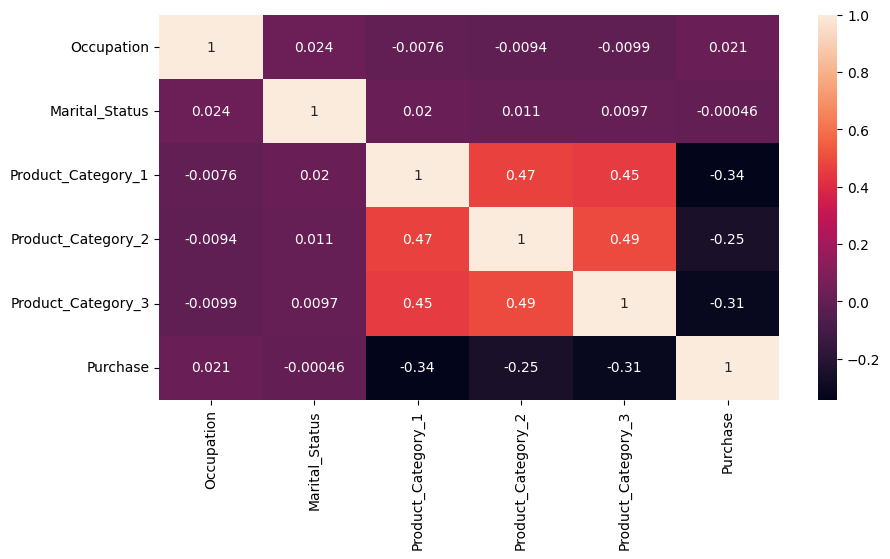

In [78]:
plt.figure(figsize=(10,5))
sns.heatmap(numcols.corr(),annot=True)

# Converting objcols into numercial with the help of label encoder

In [79]:
from sklearn.preprocessing import LabelEncoder

In [80]:
lab=LabelEncoder()

In [81]:
objcols=objcols.astype(str).apply(LabelEncoder().fit_transform)

In [82]:
objcols.head()

,Gender,Age,City_Category,Stay_In_Current_City_Years
0,0,0,0,2
1,0,0,0,2
2,0,0,0,2
3,0,0,0,2
4,1,6,2,4


In [83]:
cols=blackfriday[['Occupation','Marital_Status','Product_Category_1','Product_Category_2','Product_Category_3']]

In [84]:
combinedf=pd.concat([cols,objcols],axis=1)

In [85]:
combinedf.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Gender,Age,City_Category,Stay_In_Current_City_Years
0,10,0,3,99.0,99.0,0,0,0,2
1,10,0,1,6.0,14.0,0,0,0,2
2,10,0,12,99.0,99.0,0,0,0,2
3,10,0,12,14.0,99.0,0,0,0,2
4,16,0,8,99.0,99.0,1,6,2,4


In [86]:
bf_tt.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,M,46-50,7,B,2,1,1,11.0,99.0
1,M,26-35,17,C,0,0,3,5.0,99.0
2,F,36-45,1,B,4+,1,5,14.0,99.0
3,F,36-45,1,B,4+,1,4,9.0,99.0
4,F,26-35,1,C,1,0,4,5.0,12.0


In [87]:
bf_tt[['Gender','Age','City_Category','Stay_In_Current_City_Years']]=bf_tt[['Gender','Age','City_Category','Stay_In_Current_City_Years']].apply(lab.fit_transform)

In [88]:
bf_tt.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1,4,7,1,2,1,1,11.0,99.0
1,1,2,17,2,0,0,3,5.0,99.0
2,0,3,1,1,4,1,5,14.0,99.0
3,0,3,1,1,4,1,4,9.0,99.0
4,0,2,1,2,1,0,4,5.0,12.0


In [89]:
bf_tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      233599 non-null  int32  
 1   Age                         233599 non-null  int32  
 2   Occupation                  233599 non-null  int64  
 3   City_Category               233599 non-null  int32  
 4   Stay_In_Current_City_Years  233599 non-null  int32  
 5   Marital_Status              233599 non-null  int64  
 6   Product_Category_1          233599 non-null  int64  
 7   Product_Category_2          233599 non-null  float64
 8   Product_Category_3          233599 non-null  float64
dtypes: float64(2), int32(4), int64(3)
memory usage: 12.5 MB


In [90]:
combinedf.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Gender,Age,City_Category,Stay_In_Current_City_Years
0,10,0,3,99.0,99.0,0,0,0,2
1,10,0,1,6.0,14.0,0,0,0,2
2,10,0,12,99.0,99.0,0,0,0,2
3,10,0,12,14.0,99.0,0,0,0,2
4,16,0,8,99.0,99.0,1,6,2,4


In [91]:
bf_tt.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

## Splitting into Dependent and Independent variable

In [92]:
X=combinedf[['Gender', 'Age', 'Occupation', 'City_Category','Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3']]
y=blackfriday.Purchase

In [93]:
X.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0,0,10,0,2,0,3,99.0,99.0
1,0,0,10,0,2,0,1,6.0,14.0
2,0,0,10,0,2,0,12,99.0,99.0
3,0,0,10,0,2,0,12,14.0,99.0
4,1,6,16,2,4,0,8,99.0,99.0


# Linear Regression

In [94]:
from sklearn.linear_model import LinearRegression

In [95]:
reg=LinearRegression()

In [96]:
regmodel=reg.fit(X,y)

In [97]:
regmodel.score(X,y)

0.1572730069786582

In [98]:
from sklearn.model_selection import cross_val_score

In [99]:
cross_val_score(reg,X,y)

array([0.14258069, 0.1371416 , 0.13954872, 0.14117763, 0.21114231])

In [100]:
np.mean([0.14258069, 0.1371416 , 0.13954872, 0.14117763, 0.21114231])

0.15431819

In [101]:
repredict=regmodel.predict(X)

In [102]:
regresid=y-repredict

In [103]:
np.sqrt(np.mean(regresid**2))

4611.17802858296

In [104]:
regpredict_test=reg.predict(bf_tt)

In [105]:
pd.DataFrame(regpredict_test).to_csv('linear.csv')

# Decision Tree

In [106]:
from sklearn.tree import DecisionTreeRegressor

In [107]:
tree=DecisionTreeRegressor()

In [108]:
treemodel=tree.fit(X,y)

In [109]:
treemodel.score(X,y)

0.792011247799655

In [110]:
cross_val_score(tree,X,y)

array([0.54829319, 0.54894271, 0.55413881, 0.55032717, 0.58724026])

In [111]:
np.mean([0.54848206, 0.54867166, 0.55374925, 0.55122804, 0.58720836])

0.557867874

In [112]:
treepredict=treemodel.predict(X)

In [113]:
treeresid=y-treepredict

In [114]:
np.sqrt(np.mean(treeresid**2))

2290.8062646412236

In [115]:
tree_test=tree.predict(bf_tt)

In [116]:
pd.DataFrame(tree_test).to_csv('tree.csv')

# Random Forest

In [117]:
from sklearn.ensemble import RandomForestRegressor

In [118]:
rf=RandomForestRegressor()

In [119]:
rfmodel=rf.fit(X,y)

In [120]:
rfmodel.score(X,y)

0.7824120787192014

In [121]:
cross_val_score(rf,X,y)

array([0.62159435, 0.62317793, 0.62674947, 0.62415928, 0.65365257])

In [122]:
np.mean([0.62171254, 0.6229347 , 0.62661418, 0.6241946 , 0.653435  ])

0.629778204

In [123]:
rfpredict=rfmodel.predict(X)

In [124]:
rfresid=y-rfpredict

In [125]:
np.sqrt(np.mean(rfresid**2))

2343.073050899887

In [126]:
rf_test=rf.predict(bf_tt)

In [127]:
pd.DataFrame(rf_test).to_csv('rf.csv')

# GBM

In [128]:
from sklearn.ensemble import GradientBoostingRegressor

In [129]:
gbm=GradientBoostingRegressor()

In [130]:
gbmmodel=gbm.fit(X,y)

In [131]:
gbmmodel.score(X,y)

0.6471789163295887

In [132]:
cross_val_score(gbm,X,y)

array([0.63709273, 0.63860841, 0.63980056, 0.63961418, 0.66432512])

In [133]:
np.mean([0.63709273, 0.63860841, 0.63980056, 0.63961418, 0.66432512])

0.6438882

In [134]:
gbmpredict=gbmmodel.predict(X)

In [135]:
gbmresid=y-gbmpredict

In [136]:
np.sqrt(np.mean(gbmresid**2))

2983.6350624287775

In [137]:
gbm_test=gbm.predict(bf_tt)

In [138]:
pd.DataFrame(gbm_test).to_csv('gbm.csv')

# SVR

In [139]:
from sklearn.svm import SVR

In [140]:
svr=SVR()

In [141]:
svrmodel=svr.fit(X,y)

In [142]:
svrmodel.score(X,y)

0.11284747389719874

In [143]:
cross_val_score(svr,X,y)

array([0.10453282, 0.09835181, 0.10102798, 0.10331148, 0.13556586])

In [183]:
np.mean([0.10453282, 0.09835181, 0.10102798, 0.10331148, 0.13556586])

0.10855799000000002

In [145]:
svrpredict=svr.predict(X)

In [146]:
svr_resid=y-svrpredict

In [147]:
np.sqrt(np.mean(svr_resid**2))

4731.159441368972

In [148]:
svr_test=svr.predict(bf_tt)

In [149]:
pd.DataFrame(svr_test).to_csv('svr.csv')

# KNN

In [150]:
from sklearn.neighbors import KNeighborsRegressor

In [151]:
knr=KNeighborsRegressor()

In [152]:
knrmodel=knr.fit(X,y)

In [153]:
knrmodel.score(X,y)

0.6910113050090687

In [154]:
cross_val_score(knr,X,y)

array([0.57579579, 0.57550476, 0.57755165, 0.57874404, 0.61147703])

In [155]:
np.mean([0.57579579, 0.57550476, 0.57755165, 0.57874404, 0.61147703])

0.583814654

In [156]:
knrpredict=knr.predict(X)

In [157]:
knr_resid=y-knrpredict

In [158]:
np.sqrt(np.mean(knr_resid**2))

2792.1563435597004

In [159]:
knr_test=knr.predict(bf_tt)

In [160]:
pd.DataFrame(knr_test).to_csv('knr.csv')

# XGBOOST

In [161]:
import xgboost
from xgboost import XGBRegressor

In [162]:
xgb=XGBRegressor(learning_rate=1,max_depth=6,min_child_weight=40,seed=0,n_estimators=2000)

In [163]:
xgbmodel=xgb.fit(X,y)

c:\Users\Eswar Aditya\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Eswar Aditya\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\Eswar Aditya\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\Eswar Aditya\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be 

In [164]:
xgbmodel.score(X,y)

c:\Users\Eswar Aditya\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Eswar Aditya\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\Eswar Aditya\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\Eswar Aditya\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be 

0.7244142188219957

In [165]:
cross_val_score(xgb,X,y)

c:\Users\Eswar Aditya\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Eswar Aditya\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\Eswar Aditya\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\Eswar Aditya\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be 

array([0.6551636 , 0.65625508, 0.65758481, 0.65602778, 0.67883218])

In [184]:
np.mean([0.6551636 , 0.65625508, 0.65758481, 0.65602778, 0.67883218])

0.66077269

In [167]:
xgbpredict=xgb.predict(X)

c:\Users\Eswar Aditya\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Eswar Aditya\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\Eswar Aditya\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\Eswar Aditya\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be 

In [168]:
xgb_resid=y-xgbpredict

In [169]:
np.sqrt(np.mean(xgb_resid**2))

2636.9193103582575

In [170]:
xgbm_test=xgb.predict(bf_tt)

c:\Users\Eswar Aditya\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Eswar Aditya\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\Eswar Aditya\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\Eswar Aditya\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be 

In [171]:
pd.DataFrame(xgbm_test).to_csv('xgb.csv')

# Lightgbm

In [172]:
from lightgbm import LGBMRegressor

In [173]:
lgr=LGBMRegressor()

In [174]:
lgrmodel=lgr.fit(X,y)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007010 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 97
[LightGBM] [Info] Number of data points in the train set: 550068, number of used features: 9
[LightGBM] [Info] Start training from score 9263.968713


In [175]:
lgrmodel.score(X,y)

0.6665109903560846

In [176]:
cross_val_score(lgr,X,y)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009586 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 97
[LightGBM] [Info] Number of data points in the train set: 440054, number of used features: 9
[LightGBM] [Info] Start training from score 9253.402592
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005076 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 97
[LightGBM] [Info] Number of data points in the train set: 440054, number of used features: 9
[LightGBM] [Info] Start training from score 9247.641128
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003702 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

array([0.65610867, 0.65720218, 0.65765969, 0.65770181, 0.68119149])

In [177]:
np.mean([0.65610867, 0.65720218, 0.65765969, 0.65770181, 0.68119149])

0.661972768

In [178]:
lgbmpredict=lgrmodel.predict(X)

In [179]:
lgbmresid=y-lgbmpredict

In [180]:
np.sqrt(np.mean(lgbmresid**2))

2900.7426493793173

In [181]:
lgbmtestpredict=lgr.predict(bf_tt)

In [182]:
pd.DataFrame(lgbmtestpredict).to_csv('lgbm.csv')

# Summary
Here is the summary of all the models built on the black friday dataset. The following table shows the metrics used to compare and select the best fit model.

|Model|R_square Score|Accuracy Score|RMSE|
|--|--|--|--|
|Linear Regression|0.15727300697865831|4867.12559083909|4611.17802858296|
|Decision Tree|0.792011247799655|4139.40539092241|2290.8062646412236|
|Random Forest|0.7824086861794881|3513.61247029982|2343.091316935395|
|Gradient Boosting Machine(GBM)|0.6471789163295887|3647.56411854937|2983.6350624287775|
|Support Bector Machine(SVR)|0.11284747389719874|3948.15628340586|4731.159441368972|
|KNearestNeighbor(KNN)|0.6910113050090687|4566.68773657365|2792.1563435597004|
|XGBoost|0.7244142188219957|3491.49370422484|2636.9193103582575|
|Lightgbm|0.6665109903560846|3207.16454494605|2900.7426493793173|

According to the performance metrics, the Random Forest model has the highest R-square score and RMSE among the models tested. Here's a summary of the models:

Random Forest: R-square Score: 0.7824 Accuracy Score: 3513.61 RMSE: 2343.091 The Random Forest model shows a good balance between capturing the variance in the data and making accurate predictions. It often performs well in diverse scenarios and is less prone to overfitting compared to a single decision tree.